<a href="https://colab.research.google.com/github/vp19627/CE888/blob/master/Assignment2/UniversalBank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import pandas
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import metrics
from time import time
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics import confusion_matrix

In [20]:
# loading dataset breast cancer
from google.colab import files
uploaded = files.upload()

Saving UniversalBank.csv to UniversalBank (1).csv


In [0]:

file_name = "UniversalBank.csv"

import pandas as pd
import io
# convert to data frame
io.StringIO(uploaded["UniversalBank.csv"].decode("utf-8"))
df=pd.read_csv(io.StringIO(uploaded["UniversalBank.csv"].decode("utf-8")))

In [22]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [23]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [26]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [35]:
#ftiakse ligo metavlites
cols = ['ID', 'Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard']
df[cols] = df[cols].applymap(np.float64)
df.info()
df=df.rename(columns={"Personal Loan": "PersonalLoan"})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   float64
 1   Age                 5000 non-null   float64
 2   Experience          5000 non-null   float64
 3   Income              5000 non-null   float64
 4   ZIP Code            5000 non-null   float64
 5   Family              5000 non-null   float64
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   float64
 8   Mortgage            5000 non-null   float64
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   float64
 11  CD Account          5000 non-null   float64
 12  Online              5000 non-null   float64
 13  CreditCard          5000 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 547.0 KB


In [36]:
## distrubution of classes

count = df.PersonalLoan.value_counts()
count

0    4520
1     480
Name: PersonalLoan, dtype: int64

In [37]:
#Other way of Checking imbalance of data
labels_total=df.PersonalLoan.value_counts()
print(labels_total)

imbalance_target=(labels_total[0]/(labels_total[1]+labels_total[0]))*100
print(imbalance_target)

0    4520
1     480
Name: PersonalLoan, dtype: int64
90.4


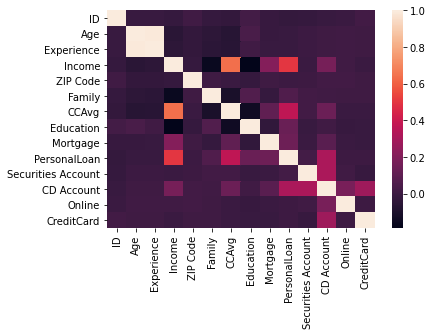

In [38]:
# corr plot
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

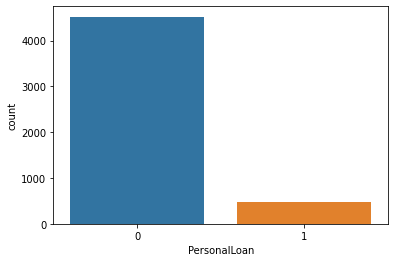

In [39]:
import seaborn as sns
%matplotlib inline  
sns.countplot(data=df,x="PersonalLoan")

**PERFORM CROSS VALIDATION**

In [40]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

print(df.shape)
df.describe().transpose()

(5000, 14)


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.5000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.3384,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.1046,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.7742,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.5030,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.3964,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.5138,1.741728,0.0,0.00,1.0,2.00,10.0
Education,5000.0,1.8810,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.4988,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.0960,0.294621,0.0,0.00,0.0,0.00,1.0


In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

x1 = df.drop('PersonalLoan', axis=1).values 
y1 = df['PersonalLoan'].values

**DECISION TREE**

Mean Accuracy: 0.808
Summary table for metrics:                precision    recall  f1-score   support

           0       1.00      0.78      0.87       913
           1       0.30      1.00      0.46        87

    accuracy                           0.80      1000
   macro avg       0.65      0.89      0.67      1000
weighted avg       0.94      0.80      0.84      1000



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


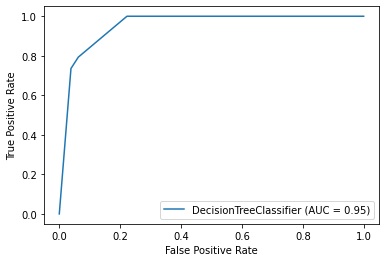

In [42]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report




# train\test split
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2)


skfold = StratifiedKFold(n_splits=10, random_state=100)
# Decision Tree Classifier
decisionTree_clf = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=2,class_weight='balanced')

# Training of the classifier
decisionTree_clf.fit(X_train, y_train)

#Cross Validating using Decision Tree
scores = cross_validate(decisionTree_clf, X_test, y_test, cv=skfold)


y_predictions=decisionTree_clf.predict(X_test)
# Classifier's accuracy
print("Mean Accuracy:", scores['test_score'].mean())

print("Summary table for metrics: ",classification_report(y_test, y_predictions))


plot_roc_curve(decisionTree_clf, X_test, y_test)
plt.show() 

**RANDOM FOREST**

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Mean accuracy: 0.874
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       899
           1       0.46      0.93      0.61       101

    accuracy                           0.88      1000
   macro avg       0.72      0.90      0.77      1000
weighted avg       0.94      0.88      0.90      1000



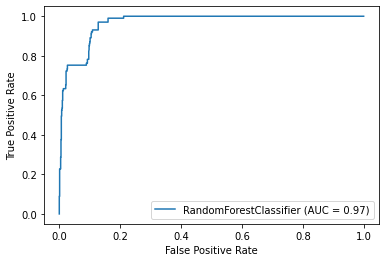

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve




# train/test split
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2)


skfold = StratifiedKFold(n_splits=10, random_state=100)
# Random forest classifier
randomForest_clf = RandomForestClassifier(criterion="gini", random_state=100, max_depth=2,class_weight='balanced_subsample')

#Training Decision Tree
randomForest_clf.fit(X_train, y_train)

#Cross Validating using Decision Tree
scores1 = cross_validate(randomForest_clf, X_test, y_test, cv=skfold)


y_prediction=randomForest_clf.predict(X_test)
#Result

print("Mean accuracy:", scores1['test_score'].mean())

print(classification_report(y_test, y_prediction))


plot_roc_curve(randomForest_clf, X_test, y_test)
plt.show() 

**Partition each of the datasets into 10 bins, keeping the imbalance ratio **

In [44]:
from sklearn.preprocessing import StandardScaler

# seperation of classes
df_0=df[df['PersonalLoan']==0]
df_1=df[df['PersonalLoan']==1]

#Countig length of each class data

ln0=int(len(df_0)/10)
ln1=int(len(df_1)/10)

init0=0
init1=0

bins=[]

#original Imbalance
orig_imbalance=(labels_total[0]/(labels_total[1]+labels_total[0]))*100
print("Original Imbalance in the dataset: {} %".format(orig_imbalance))

#Creating 10 bins keeping imbalance percentage as original
for i in range(10):
    curr_bin=pd.concat([df_0.iloc[init0:init0+ln0,:],df_1.iloc[init1:init1+ln1,:]])
    total_lbs=curr_bin.PersonalLoan.value_counts()
    imbalance=(total_lbs[0]/(total_lbs[0]+total_lbs[1]))*100
    print("Class imbalance ratio in bin {} : {} %".format(i,imbalance))
    bins.append(curr_bin.values)
    init0+=ln0
    init1+=ln1


# Preprocessing 9 Bins data as X_train and curr_bin as X_test
bin9=np.vstack((bins[j] for j in range(10) if j!=i )) #combining 9 bins data
data=pd.DataFrame(bin9)
data.columns=df.columns

X_train=data.iloc[:,1:9]
y_train=data.iloc[:,9:11]
X_test=curr_bin.iloc[:,1:9]
y_test=curr_bin.iloc[:,9:11]

# standardised data
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# applying PCA for two components that capture most variance of the data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

Original Imbalance in the dataset: 90.4 %
Class imbalance ratio in bin 0 : 90.4 %
Class imbalance ratio in bin 1 : 90.4 %
Class imbalance ratio in bin 2 : 90.4 %
Class imbalance ratio in bin 3 : 90.4 %
Class imbalance ratio in bin 4 : 90.4 %
Class imbalance ratio in bin 5 : 90.4 %
Class imbalance ratio in bin 6 : 90.4 %
Class imbalance ratio in bin 7 : 90.4 %
Class imbalance ratio in bin 8 : 90.4 %
Class imbalance ratio in bin 9 : 90.4 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


**ELBOW METHOD**

Text(0, 0.5, 'Total within-cluster sum of squares')

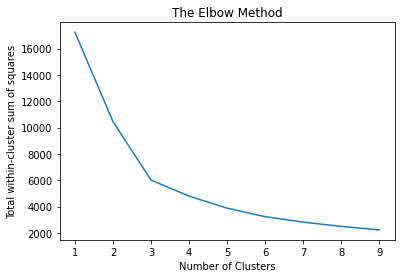

In [45]:
twss=[]
sa=[]
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init= 'k-means++')
    kmeans.fit(X_train_pca)
    Ypreds=kmeans.predict(X_train_pca)
    twss.append(kmeans.inertia_)
    if i>1:
        sa.append(silhouette_score(X_train_pca, Ypreds))

plt.plot(range(1,10),twss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Total within-cluster sum of squares')

**SILHUETE METHOD**

Para n_clusters = 2 O score_silhouette médio é : 0.38609092587599875
Para n_clusters = 3 O score_silhouette médio é : 0.44329595356681484
Para n_clusters = 4 O score_silhouette médio é : 0.41747793602741595
Para n_clusters = 5 O score_silhouette médio é : 0.3657324897439162
Para n_clusters = 6 O score_silhouette médio é : 0.3585501964703509


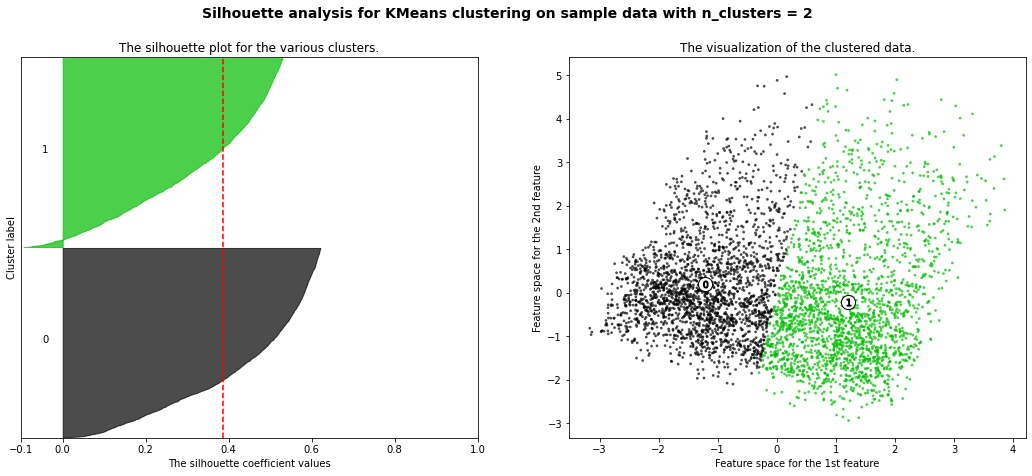

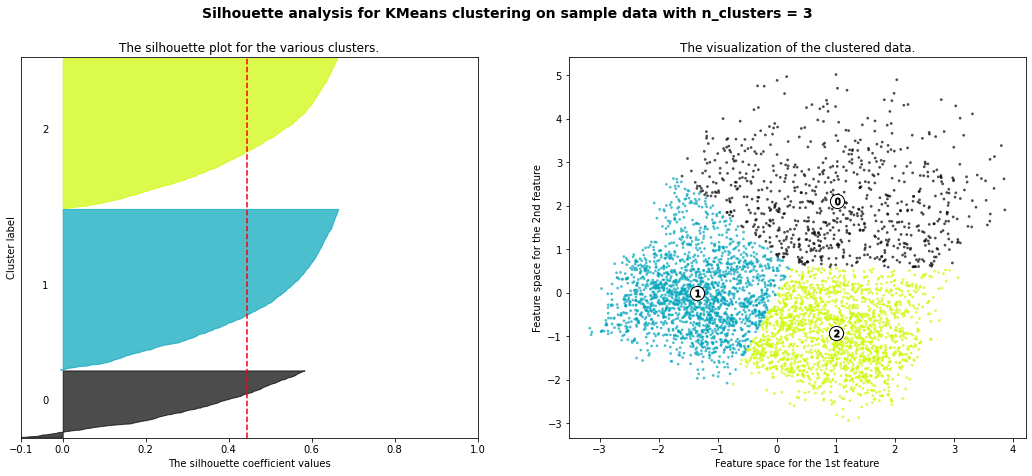

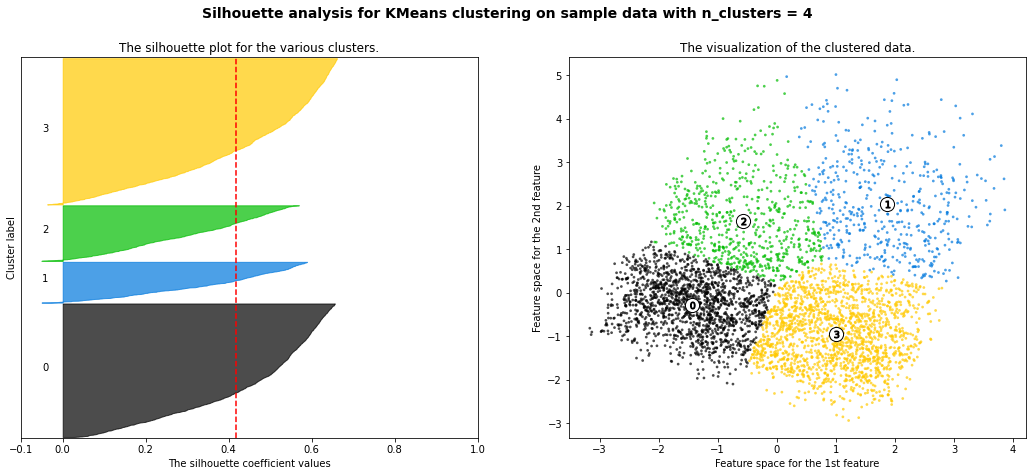

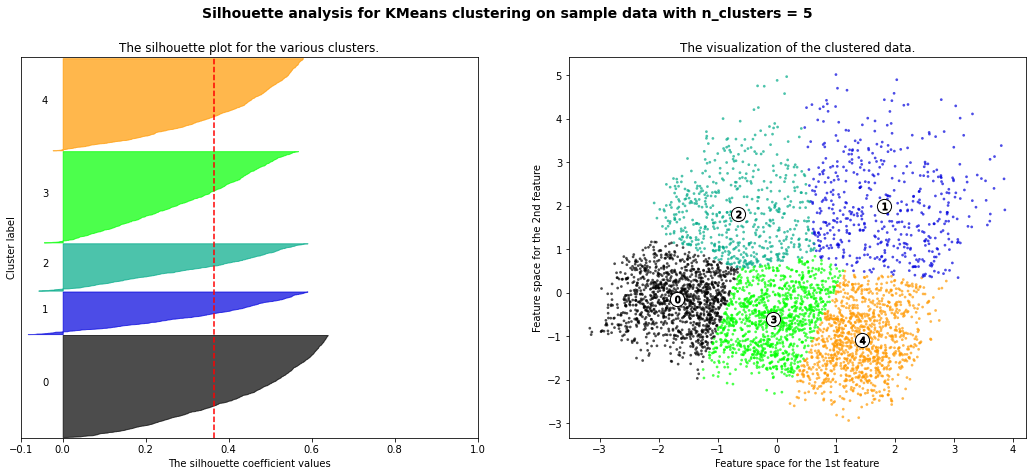

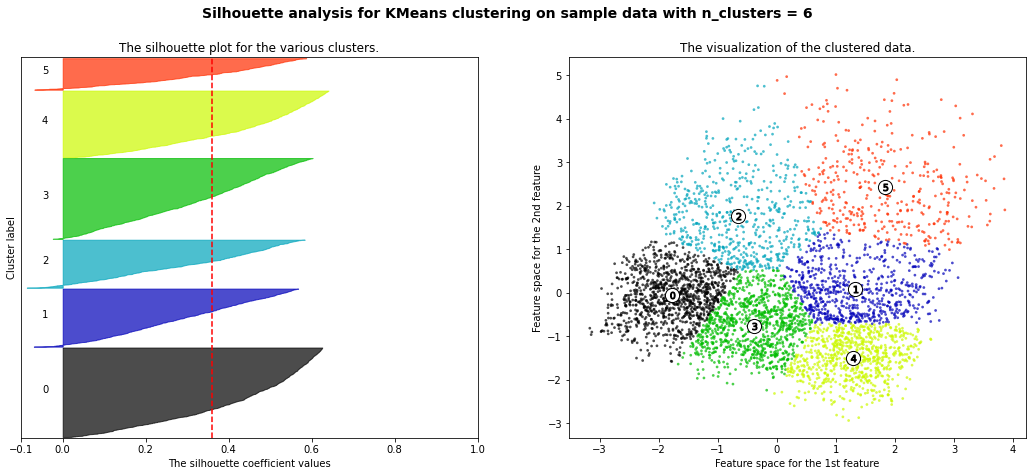

In [46]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train_pca) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train_pca)
# The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train_pca, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "O score_silhouette médio é :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train_pca, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color,       alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train_pca[:, 0], X_train_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()

**RUN K-MEANS**

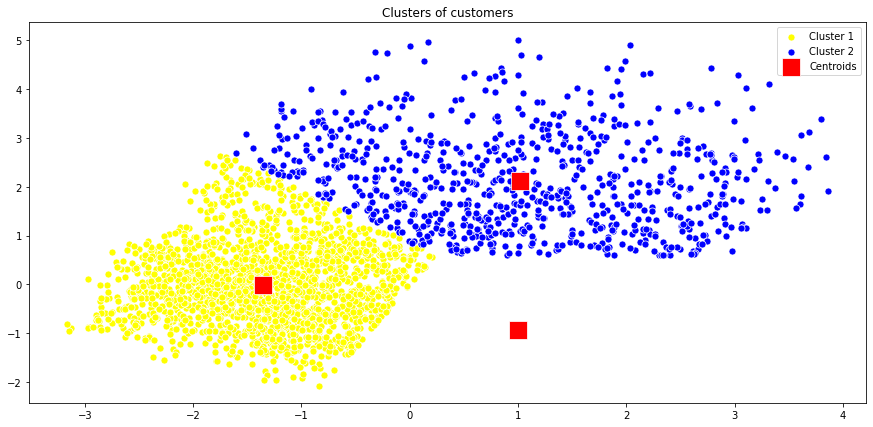

In [47]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_train_pca)

# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X_train_pca[y_kmeans == 0, 0], X_train_pca[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X_train_pca[y_kmeans == 1, 0], X_train_pca[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)


sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
#plt.xlabel('Annual Income (k$)')
#plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**For each cluster identify its centroid and the number of samples of the minority class in that cluster**

In [49]:
clr_dt=data

#cols=list(cluster_data.columns)
clr_dt["Cluster label"]=kmeans.labels_


clr_in = pd.DataFrame()

clr_in=pd.DataFrame(columns=["Centroid","Cluster label","Min_cluster1","Max_cluster0"])

for i in clr_dt["Cluster label"].unique():
    count1=np.sum(clr_dt[(clr_dt['PersonalLoan']==1) & (clr_dt["Cluster label"]==i)].count().unique())
    count0=np.sum(clr_dt[(clr_dt['PersonalLoan']==0) & (clr_dt["Cluster label"]==i)].count().unique())
    center=kmeans.cluster_centers_[i]
    clr_in = clr_in.append(pd.Series(data={'Centroid':center,'Cluster label':i, 'Min_cluster1':count1, 'Max_cluster0':count0}), ignore_index=True)


clr_in

,Centroid,Cluster label,Min_cluster1,Max_cluster0
0,"[1.0000990200354012, -0.9286748024191055]",2,71,1717
1,"[-1.355429022029317, -0.008511294887870884]",0,83,1834
2,"[1.019094826926926, 2.1091656591514556]",1,278,517


**Train a random forest for each of the clusters that contains samples from more than one class**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Score for Random Forest  is:0.738


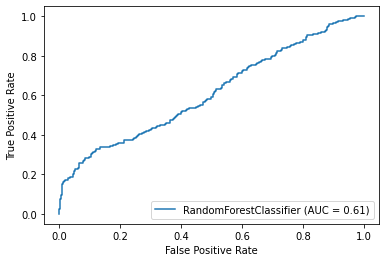

In [56]:
from sklearn.metrics import accuracy_score as acc
from statistics import *

Two_cls_info=clr_in[(clr_in['Min_cluster1']>0) & (clr_in['Max_cluster0']>0)]
Two_cls_labels=Two_cls_info['Cluster label']
Two_cls_data=pd.DataFrame()
Two_cls_data.dropna
for i in Two_cls_labels:
  df=clr_dt[clr_dt['Cluster label']==i]
  Two_cls_data=Two_cls_data.append(df)

#random forest classifier 
randomForest_clf =RandomForestClassifier(n_estimators=100, min_samples_split=10,random_state=50)

#empty list for the scores
score=[]

# train/test data needed
X_train, X_test, y_train, y_test = train_test_split(Two_cls_data.iloc[:,1:len(Two_cls_data.columns)-2], Two_cls_data.iloc[:,len(Two_cls_data.columns)-2:len(Two_cls_data.columns)-1], test_size=0.2)

#fitting the classifier
randomForest_clf.fit(X_train,y_train)

y_pred=randomForest_clf.predict(X_test)
y_tr=y_test
score.append(acc(y_tr,y_pred))
print("Score for Random Forest  is:{:.3f}".format(mean(score)) )

#plot
plot_roc_curve(randomForest_clf, X_test, y_test)
plt.show()

**Assign x from the unseen fold to its closest cluster and If this cluster has only instances of one class, assign to x that label**

In [0]:
#If cluster has only one instance of class then label will be that class itself
clr_in['new_label']=np.where(clr_in['Max_cluster0']>clr_in['Min_cluster1'],0,1)

#Copying cluster_info to cluster_info_new and adding 'New_label' column with modified labels

clr_in_new=clr_in
n_clusters=2
#X_test_labels contain assignment of labels on base of elucdian distance from centroids
X_test_labels=np.zeros(X_test_pca.shape[0])
for i in range(len(X_test_pca)):
  min_dis=10000
  for j in range(n_clusters-2):
    if np.linalg.norm(X_test_pca[i]-kmeans.cluster_centers_[j])<min_dis:
      min_dis=np.linalg.norm(X_test_pca[i]-kmeans.cluster_centers_[j])
      X_test_labels[i]=clr_in_new['new_label'][j]

curr_bin["Cluster lable"]=X_test_labels
curr_bin["Cluster lable"] = curr_bin["Cluster lable"].astype(int)

**Method to find out cluster label of left out fold**

In [54]:
def cluster_to_label(a):
    if a == 0:
        return int(clr_in[clr_in['Cluster label']==a]['new_label'])
    if a == 1:
        return int(clr_in[clr_in['Cluster label']==a]['new_label'])
    if a == 2:
        return int(clr_in[clr_in['Cluster label']==a]['new_label'])
    if a == 3:
        return int(clr_in[clr_in['Cluster label']==a]['new_label'])
    if a == 4:
        return int(clr_in[clr_in['Cluster label']==a]['new_label'])
    if a == 5:
        return int(clr_in[clr_in['Cluster label']==a]['new_label'])
    if a == 6:
        return int(clr_in[clr_in['Cluster label']==a]['new_label'])
    if a == 7:
        return int(clr_in[clr_in['Cluster label']==a]['new_label'])

prd=kmeans.fit_predict(X_test_pca)
labels_ = prd
curr_bin['cluster_label']=labels_
curr_bin['class_label']=curr_bin['cluster_label'].apply(cluster_to_label)



print(pd.crosstab(curr_bin['PersonalLoan'],curr_bin['class_label']))
print("Accuracy: " ,acc(curr_bin['class_label'],curr_bin['PersonalLoan']))

class_label     0
PersonalLoan     
0             452
1              48
Accuracy:  0.904


**DT and RF model with 10 bin**

Accuracy for Decision Tree: 0.71 
Accuracy for Random Forest: 0.71 
Summary table of metriccs for Decision Tree :
              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83       353
         1.0       0.00      0.00      0.00       147

    accuracy                           0.71       500
   macro avg       0.35      0.50      0.41       500
weighted avg       0.50      0.71      0.58       500

Summary table of metrics for Random Forest:
              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83       353
         1.0       0.00      0.00      0.00       147

    accuracy                           0.71       500
   macro avg       0.35      0.50      0.41       500
weighted avg       0.50      0.71      0.58       500



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


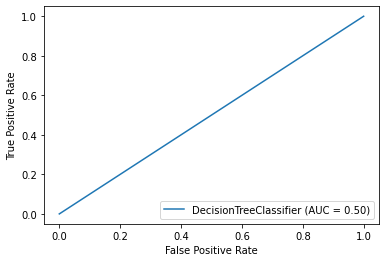

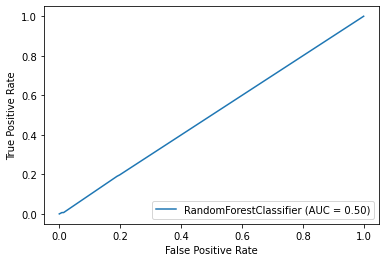

In [55]:
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score as acc
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score as r2
from sklearn.metrics import roc_auc_score as ras


randomForest_clf =RandomForestClassifier(n_estimators=1000,max_depth=8,criterion='entropy', min_samples_split=100,
                                random_state=100)
decisionTree_clf=DecisionTreeClassifier(min_samples_split=10,max_depth=8,
                                random_state=100)
new_randomForest_score=[]
new_decisionTree_score=[]

init0=0
init1=0

for i in range(10):
    curr_bin=pd.concat([df_0.iloc[init0:init0+ln0,:],df_1.iloc[init1:init1+ln1,:]])
    curr_bin=pd.DataFrame(curr_bin)


# PCA and Scaling of the data
    X_test_bin=curr_bin.iloc[:,1:len(curr_bin.columns)-2]
    X_test_bin=sc.fit_transform(X_test_bin)
    X_test_bin_pca= pca.fit_transform(X_test_bin)
    X_train_bin=x1[i:-1]
    X_train=sc.fit_transform(X_train_bin)
    X_train_pca= pca.fit_transform(X_train_bin)
    X_test_bin=sc.fit_transform(X_test_bin)
    y_train=y1[i:-1]
    y_test_bin=curr_bin.iloc[:,len(curr_bin.columns)-1:len(curr_bin.columns)]

#Fitting both model for current bin    
    decisionTree_clf.fit(X_train_pca,y_train)
    randomForest_clf.fit(X_train_pca,y_train)

#predicting for testing edw
    yrf_pred=randomForest_clf.predict(X_test_bin_pca)
    ydt_pred=decisionTree_clf.predict(X_test_bin_pca)
    y_true=y_test_bin
    new_decisionTree_score.append(acc(y_true,ydt_pred))
    new_randomForest_score.append(acc(y_true,yrf_pred)) 


#accuracies of classifiers
print("Accuracy for Decision Tree: %0.2f " % (mean(new_decisionTree_score)))
print("Accuracy for Random Forest: %0.2f " % (mean(new_randomForest_score)))


#Result
print("Summary table of metriccs for Decision Tree :")

print(classification_report(y_true, ydt_pred))

print("Summary table of metrics for Random Forest:")

print(classification_report(y_true, yrf_pred))

# plot1
plot_roc_curve(decisionTree_clf, X_test_bin_pca, y_test_bin.values.ravel()) 
plt.show()

#plot2
plot_roc_curve(randomForest_clf,X_test_bin_pca, y_test_bin.values.ravel()) 
plt.show()